In [1]:
from chainercv.transforms import center_crop, resize
from imageio import imread

# from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

(335, 500, 3)


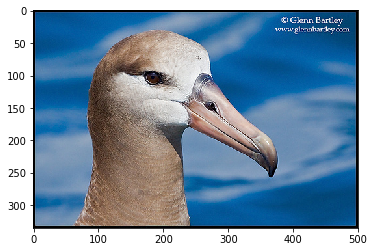

In [2]:
im = imread("/home/korsch/Downloads/alba.jpg")
print(im.shape)
plt.imshow(im)
plt.show()

In [3]:
import PIL

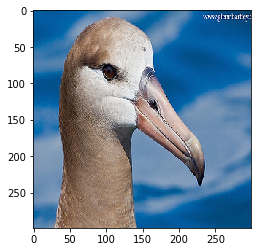

In [4]:
im = imread("/home/korsch/Downloads/alba.jpg")

h, w, c = im.shape
crop_size = list(map(int, [h * 0.875, w * 0.875]))
_im = im.transpose(2, 0, 1)
im_crop = resize(
    center_crop(_im, crop_size), 
    size=(299, 299),
    interpolation=PIL.Image.LANCZOS).transpose(1,2,0)
plt.imshow(im_crop)
plt.show()

In [5]:
im_crop.dtype

dtype('uint8')

In [6]:
tf_im = np.load("/home/korsch/Downloads/tf_alba.npy")
im = imread("/home/korsch/Downloads/alba.jpg")
tf_im.shape, im.shape

((335, 500, 3), (335, 500, 3))

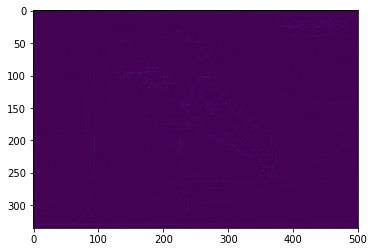

(0.0, 0.05359476443404466, 0.004828304583973269)

In [7]:
diff = np.abs(tf_im - im / 255).mean(axis=-1)
plt.imshow(diff, vmin=0, vmax=1)
plt.show()

diff.min(), diff.max(), diff.mean()

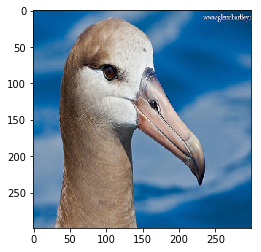

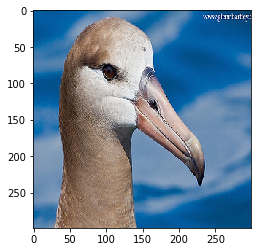

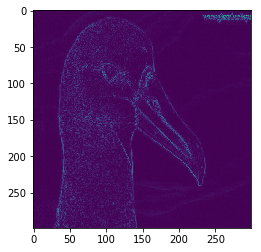

1.13365696829959e-08 0.7134346700961293 0.02588452959419764


In [8]:
tf_im_crop = np.load("/home/korsch/Downloads/tf_alba_crop.npy")
tf_im_crop.shape, im_crop.shape
plt.imshow((tf_im_crop+1)/2)
plt.show()

plt.imshow(im_crop)
plt.show()

_im_crop = im_crop / 255
_im_crop = _im_crop * 2 - 1
diff = np.abs(_im_crop - tf_im_crop).mean(axis=-1) / 2
plt.imshow(diff, vmin=0, vmax=1)
plt.show()

print(diff.min(), diff.max(), diff.mean())